# Introduction

In this section, we are going to explore the vehicles' conditions and how they affected their sales, this would be done by answering the following questions:
- What was the average condition for each of the top 10 most selling makes?
- How popular was each transmission type, and how much is the average selling price for each?
- What is the average mileage (odometer) for Audi vehicles sold between 1990 and 2010?

# Import and load data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sys
import os

sys.path.append(os.path.abspath('../src'))

from data_loader import load_data

In [2]:
data = load_data("data.csv", "processed", False)

# Average codition of each of the top 10 most selling makes

In [4]:
# Find the names of the top makes
topmakes = data.make.value_counts().sort_values(ascending=False).index

In [7]:
# average condition for each make
condition_avgs = [] 
for make in topmakes:
    condition_avgs.append(data[data.make == make].condition.mean())

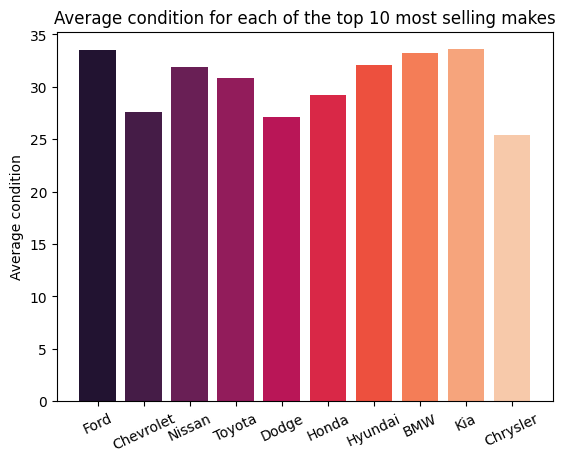

In [6]:
plt.bar(topmakes[:10], condition_avgs[:10], color=sns.color_palette("rocket", 10))
plt.xticks(rotation=25)
plt.ylabel("Average condition")
plt.title("Average condition for each of the top 10 most selling makes")
plt.savefig("../Visualizations/Condition/condition_avg.png")

# Transmission types popularity and average selling prices

In [6]:
types = data.transmission.value_counts() # Types of transmission

In [7]:
avgs = [] # Average delling price for each transmission type
for type in types.index:
    avgs.append(data[data.transmission == type].sellingprice.mean())

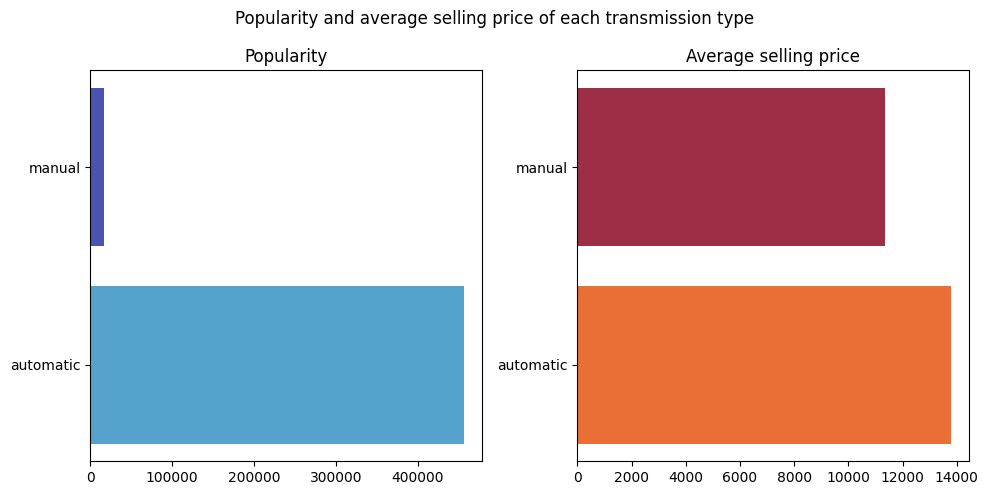

In [35]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

ax[0].barh(types.index[:2], types.iloc[:2], color=sns.color_palette("icefire"))
ax[0].set_title("Popularity")

ax[1].barh(types.index[:2], avgs[:2], color=sns.color_palette("icefire_r"))
ax[1].set_title("Average selling price")

plt.suptitle("Popularity and average selling price of each transmission type")
plt.tight_layout()
plt.savefig("../Visualizations/Condition/transmission.png")